<a href="https://colab.research.google.com/github/PierluigiRiti2/ET5003_SEM1_2021-2/blob/main/ET5003_KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [27]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "1" #@param {type:"string"}
Student_ID&Name = "18213561 Pierluigi Riti" #@param {type:"string"}
Student_ID&Name = "18213561 Pierluigi Riti" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

SyntaxError: ignored

In [29]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

NameError: ignored

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [30]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [50]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [33]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [35]:
!pip install gpy

In [36]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az
# import math for check the NaN value
import math

In [37]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

# Loading the data

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Path, copy the path from your Drive
Path = '/content/drive/MyDrive/Colab Notebooks/KaggleCompetition/House_Dataset/'

# Price Data
train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

# train data
df_train = pd.read_csv(train_data)
#X_train = df_train.drop("label",axis=1).values
#y_train = df_train.label.values
df_train.describe()

# test data
df_test = pd.read_csv(test_data)
#X_test = df_test.drop("label",axis=1).values
#y_test = df_test.label.values
#print(X_test.shape)

In [55]:
df_train.head(5)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [56]:
df_train.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [57]:
df_train.shape

(1638, 14)

In [58]:
df_train["Services"].head(15)


0                                         NaN
1                                         NaN
2                                         NaN
3                                         NaN
4                                         NaN
5                                         NaN
6                                         NaN
7                                         NaN
8                                         NaN
9                                         NaN
10                                        NaN
11                                        NaN
12    Parking,Gas Fired Central Heating,Alarm
13                                        NaN
14         Parking,Wired for Cable Television
Name: Services, dtype: object

In [99]:
service = []
# Identify the unique value in the column for the ber_classification
services = df_train["Services"].unique()
# create a list of all the service
for element in services:
  if (str(element) != 'nan'):
    service += element.split(',')
service = [x.strip() for x in service]
# convert the service in an Numpy Array
np_service = np.array(service)
# create an array with all the Unique value
services = np.unique(np_service)

#create the colum and fill the value with "No"
for service in services:
  df_train[service] = df_train["Services"].str.contains(service).fillna("No")
  df_train[service].replace({True : "Yes", False : "No"}, inplace=True)
  mapper = {"Yes": 1,"No": 0}
  df_train[service] = df_train[service].replace(mapper)


df_train.head(15)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price,Alarm,Gas Fired Central Heating,Oil Fired Central Heating,Parking,Wheelchair Access,Wired for Cable Television
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000,0,0,0,0,0,0
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000,0,0,0,0,0,0
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000,0,0,0,0,0,0
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000,0,0,0,0,0,0
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000,0,0,0,0,0,0
5,6,12225979,Glasnevin,1,3,E1,Property Team Lappin Estates take great pleasu...,NaN,None,53.380367,-6.279310,terraced,140.00,360000,0,0,0,0,0,0
6,7,12209989,North Circular Road,1,2,C3,6 Marlborough Court is a bright and spacious t...,NaN,First floor purpose built apartment\nCul de sa...,53.355659,-6.294885,apartment,70.98,300000,0,0,0,0,0,0
7,8,12084555,Clondalkin,2,4,NaN,An outstanding detached Victorian Villa dating...,NaN,Magnificent detached Victorian Villa dating fr...,53.318857,-6.391826,detached,244.98,590000,0,0,0,0,0,0
8,9,12405966,Finglas,3,2,NaN,Ray Cooke Auctioneers are excited to present t...,NaN,None,53.400071,-6.304156,terraced,72.00,229000,0,0,0,0,0,0
9,10,12202195,Howth,2,2,NaN,Needles Cottage is located on the southern slo...,NaN,None,53.366407,-6.077866,semi-detached,63.70,499500,0,0,0,0,0,0


In [60]:
# Identify the unique value in the column for the ber_classification
ber_class = df_train["BER_class"].unique()

# convert the array of classification in the mapper
ber_mapper = { ber_class[i] : i+1 for i in range(0, len(ber_class) ) }
# apply the transformer on the train dataset and the test dataset
df_train['BER_class'] = df_train['BER_class'].replace(ber_mapper)

In [61]:
# Identify the unique value in the column for the Type
type_house = df_train["Type"].unique()

# convert the array of type in the mapper
type_mapper = { type_house[i] : i+1 for i in range(0, len(type_house) ) }
# apply the transformer on the train dataset and the test dataset
df_train["Type"] = df_train["Type"].replace(type_mapper)

In [63]:
# Identify the unique value in the column for the Location
locations = df_train["Location"].unique()

# convert the array of locations in the mapper
location_mapper = { locations[i] : i+1 for i in range(0, len(locations) ) }
df_train["Location"] = df_train["Location"].replace(location_mapper)

In [48]:
df_train.head(5)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,1,2,2,1,DNG are delighted to present to the market no....,1,None,53.396659,-6.438791,1,67.00,195000
1,2,12320330,2,1,2,2,13 Northbrook Terrace is a charming red brick ...,1,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,2,95.97,425000
2,3,12405953,3,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",1,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,3,107.00,535000
3,4,12202582,4,1,3,4,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,1,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,4,81.00,499000
4,5,12299336,5,3,4,2,'Four Seasons' comes to the market as a wonder...,1,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,4,153.00,510000


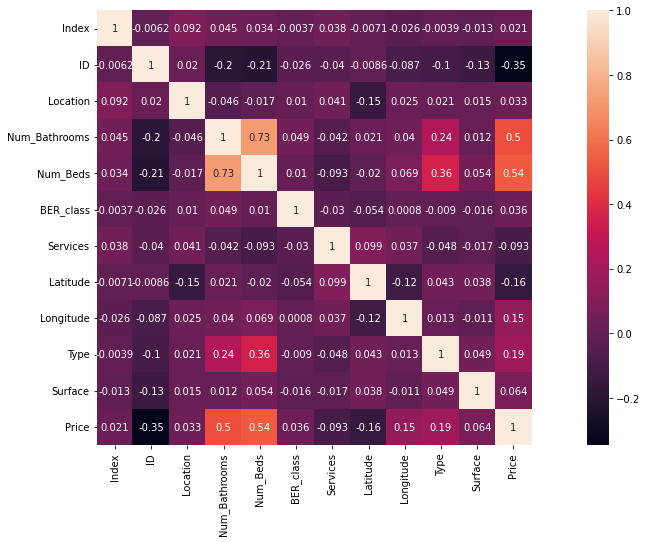

In [51]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_train.corr(), square=True, annot=True);

The dataset have now number in all the possible feature, the only feature not yes Integer Encoded are the _Description_ and _Features_ at this point I need to use NLP to parse the _Description_ and the _Features_ per estrarre nuove features to add on the dataframe https://realpython.com/nltk-nlp-python/

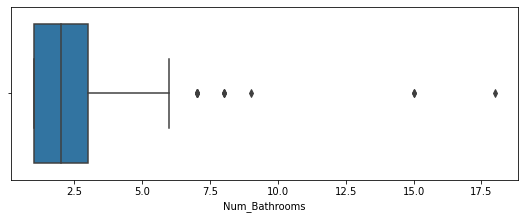

In [64]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(2,2,1)
sns.boxplot(x=df_train["Num_Bathrooms"])

## Training & Test Data

In [72]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

NameError: ignored

### Train dataset

In [ ]:
# training dataset: 
training_file = syntPath+filename1
# test dataset: 
testing_file = syntPath+filename2
# cost dataset: 
cost_file = syntPath+filename3

In [ ]:
# show first data frame rows 
dftrain.head()

In [ ]:
# Generate descriptive statistics
dftrain.describe()

### Test dataset

In [ ]:
# show first data frame rows 
dftest.head()

In [ ]:
# Generate descriptive statistics
dftest.describe()

### Expected Cost dataset

In [ ]:
# Generate descriptive statistics
dfcost.describe()

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.